<a href="https://colab.research.google.com/github/danushkhanna/iNeuron.ai-Phishing-Domain-Detection/blob/edit_1/ineuron_dataset_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/danushkhanna/iNeuron.ai-Phishing-Domain-Detection.git

In [1]:
 pip install pandas numpy seaborn matplotlib pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00

In [2]:
#IMPORTING ALL NECESSARY LIBRARIES & PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pycaret.classification import *


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#IMPORTING THE DATASET AND SHOWING IT

df=pd.read_csv('/content/drive/MyDrive/ineuron/dataset_full.csv')
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [5]:
#SUMMARY STATISTICS OF THE DATASET

print(df.describe())

        qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
count  88647.000000    88647.000000       88647.000000   88647.000000   
mean       2.191343        0.328810           0.113879       1.281781   
std        1.235636        1.119286           0.657767       1.893929   
min        1.000000        0.000000           0.000000       0.000000   
25%        2.000000        0.000000           0.000000       0.000000   
50%        2.000000        0.000000           0.000000       0.000000   
75%        2.000000        0.000000           0.000000       2.000000   
max       24.000000       35.000000          21.000000      44.000000   

       qty_questionmark_url  qty_equal_url    qty_at_url   qty_and_url  \
count          88647.000000   88647.000000  88647.000000  88647.000000   
mean               0.009329       0.205861      0.022133      0.140885   
std                0.112568       0.954272      0.279652      0.924864   
min                0.000000       0.000000    

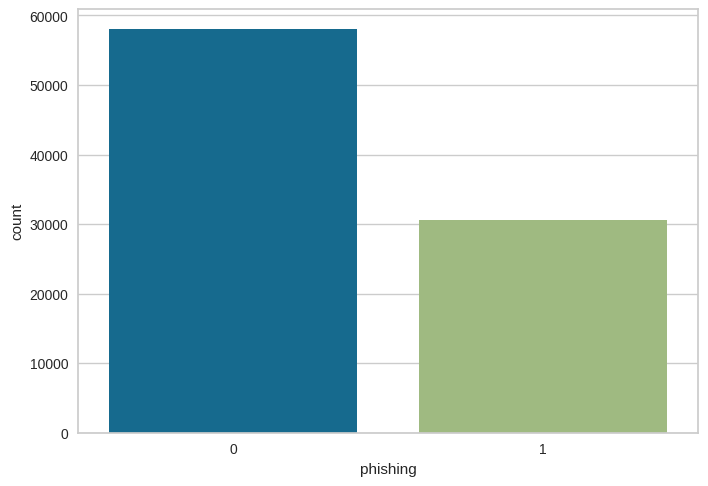

In [6]:
#VISUALIZING THE DISTRIBUTION OF THE DATASET

sns.countplot(x='phishing', data=df)
plt.show()

In [7]:
cols_to_drop = ['url_google_index',
                  'domain_google_index',
                  'qty_vowels_domain']
df=df.drop(cols_to_drop, axis=1)

In [8]:
#PERFORMING FEATURE ENGINEERING ON DATA AND SHOWING IT
rows, columns = df.shape

original_features = list(df.columns)

dataset_array = np.array(df)

features_indices = []
attributes = ['url', 'domain', 'directory', 'file', 'params']

new_dataset = {}

for index, name in enumerate(original_features):
    if 'qty' in name and name.split('_')[-1] in attributes:
        features_indices.append([index, name.split('_')[-1]])
    else:
        new_dataset[name] = dataset_array[:, index]


for index, attribute in features_indices:
    if f"qty_char_{attribute}" not in new_dataset.keys():
        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)
    
    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

df1 = pd.DataFrame(new_dataset).astype(int)
df1[df1<-1] = -1
df1

,length_url,domain_length,domain_in_ip,server_client_domain,directory_length,file_length,params_length,tld_present_params,email_in_url,time_response,...,ttl_hostname,tls_ssl_certificate,qty_redirects,url_shortened,phishing,qty_char_url,qty_char_domain,qty_char_directory,qty_char_file,qty_char_params
0,25,17,0,0,8,7,-1,-1,0,0,...,892,0,0,0,1,5,2,2,1,-1
1,223,16,0,0,42,9,165,0,0,0,...,9540,1,0,0,1,17,2,6,1,9
2,15,14,0,0,1,0,-1,-1,0,0,...,589,1,0,0,0,4,2,1,0,-1
3,81,19,0,0,62,9,-1,-1,0,0,...,292,1,0,0,1,12,2,9,1,-1
4,19,19,0,0,-1,-1,-1,-1,0,0,...,3597,0,1,0,0,3,2,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,0,-1,-1,-1,-1,0,0,...,3597,0,0,0,0,6,4,-1,-1,-1
88643,34,34,0,0,-1,-1,-1,-1,0,0,...,591,0,2,0,0,3,2,-1,-1,-1
88644,70,22,0,0,48,11,-1,-1,0,0,...,14391,1,0,0,1,9,1,7,1,-1
88645,28,27,0,0,1,0,-1,-1,0,0,...,52,1,0,0,1,4,2,1,0,-1


In [9]:
# SAVING FEATURES TO DRIVE
df1.to_csv('/content/drive/MyDrive/ineuron/features_new.csv')

In [10]:
#PLOTTING A CORRELATION MATRIX TO IDENTIFY ANY STRONG CORRELATIONS

corr = df1.corr()
plt.figure(figsize=(100, 100))
sns.heatmap(corr, annot=True)
plt.show()

In [11]:
#SUMMARY STATISTICS OF THE DATASET

print(df1.describe())

         length_url  domain_length  domain_in_ip  server_client_domain  \
count  88647.000000   88647.000000  88647.000000          88647.000000   
mean      36.347615      18.560820      0.002267              0.004501   
std       46.191590       6.598694      0.047564              0.066939   
min        4.000000       4.000000      0.000000              0.000000   
25%       17.000000      14.000000      0.000000              0.000000   
50%       22.000000      18.000000      0.000000              0.000000   
75%       38.000000      22.000000      0.000000              0.000000   
max     4165.000000     231.000000      1.000000              1.000000   

       directory_length   file_length  params_length  tld_present_params  \
count      88647.000000  88647.000000   88647.000000        88647.000000   
mean          10.857694      2.743793       5.273185           -0.891739   
std           24.352634     13.572252      34.937007            0.381593   
min           -1.000000     -

In [12]:
#SETTING UP THE DATA FOR MODELLING

setup(data=df1, target='phishing')

,Description,Value
0,Session id,7391
1,Target,phishing
2,Target type,Binary
3,Original data shape,"(88647, 27)"
4,Transformed data shape,"(88647, 27)"
5,Transformed train set shape,"(62052, 27)"
6,Transformed test set shape,"(26595, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [13]:
#COMPARING AND SELECTING THE BEST DATA

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9686,0.9934,0.9592,0.9505,0.9548,0.9308,0.9308,6.6650
rf,Random Forest Classifier,0.9684,0.9938,0.9592,0.9499,0.9545,0.9303,0.9303,8.2210
xgboost,Extreme Gradient Boosting,0.9677,0.9941,0.9544,0.9523,0.9533,0.9286,0.9286,10.2090
lightgbm,Light Gradient Boosting Machine,0.9629,0.9931,0.9494,0.9436,0.9465,0.9181,0.9181,1.5050
dt,Decision Tree Classifier,0.9507,0.9454,0.9279,0.9294,0.9287,0.8910,0.8910,0.5350
gbc,Gradient Boosting Classifier,0.9491,0.9875,0.9340,0.9199,0.9269,0.8878,0.8879,11.5240
ada,Ada Boost Classifier,0.9337,0.9823,0.9037,0.9045,0.9041,0.8534,0.8535,3.0750
lda,Linear Discriminant Analysis,0.8989,0.9606,0.7963,0.8997,0.8448,0.7702,0.7734,0.4010
ridge,Ridge Classifier,0.8971,0.0000,0.7884,0.9018,0.8412,0.7657,0.7695,0.1430
lr,Logistic Regression,0.8905,0.9546,0.7691,0.8996,0.8292,0.7494,0.7544,4.1460


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
#TUNING THE HYPERPARAMETERS OF THE BEST PERFORMING MODEL

tuned_model = tune_model(best_model, n_iter=1, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9004,0.9550,0.9296,0.8103,0.8659,0.7873,0.7920
1,0.9014,0.9546,0.9436,0.8048,0.8687,0.7906,0.7970
2,0.8951,0.9529,0.9250,0.8020,0.8591,0.7762,0.7812
3,0.9007,0.9536,0.9273,0.8122,0.8659,0.7876,0.7920
4,0.8962,0.9551,0.9329,0.8001,0.8614,0.7792,0.7851
5,0.8936,0.9524,0.9268,0.7981,0.8576,0.7735,0.7790
6,0.8927,0.9534,0.9212,0.7990,0.8558,0.7710,0.7759
7,0.8946,0.9570,0.9347,0.7960,0.8598,0.7762,0.7826
8,0.8891,0.9505,0.9231,0.7911,0.8520,0.7642,0.7700


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 1 candidates, totalling 10 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.6 MB/s eta 0:00:00


In [16]:
#MAKING PREDICTIONS ON NEW DATA

predictions = predict_model(tuned_model, data=df1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9898,0.9989,0.9873,0.9834,0.9853,0.9775,0.9775


In [17]:
# PICKLE MODEL TO BE USED IN INTERFACE
pickle_file = open('/content/drive/MyDrive/ineuron/phishing_url_detector.pkl', 'wb')
pickle.dump(tuned_model, pickle_file)
pickle_file.close()